In [ ]:
pip install diffusers
pip install torch

In [3]:
from diffusers import StableDiffusionPipeline, StableDiffusionImg2ImgPipeline

# Charger les composants du modèle de pipeline Stable Diffusion
model_id = "runwayml/stable-diffusion-v1-5"
stable_diffusion_txt2img = StableDiffusionPipeline.from_pretrained(model_id, use_safetensors=True,
    safety_checker=None,  # Désactiver le vérificateur de sécurité
    feature_extractor=None,  # Désactiver l'extracteur de fonctionnalités
    requires_safety_checker=False,)

# Sauvegarder les composants pour réutilisation
components = stable_diffusion_txt2img.components

# Créer une nouvelle instance de pipeline Stable Diffusion pour l'image vers l'image
stable_diffusion_img2img = StableDiffusionImg2ImgPipeline(**components)



# Créer une autre instance de pipeline Stable Diffusion pour le texte vers l'image,
# en personnalisant les composants utilisés
stable_diffusion_txt2img_custom = StableDiffusionPipeline(
    vae=stable_diffusion_txt2img.vae,
    text_encoder=stable_diffusion_txt2img.text_encoder,
    tokenizer=stable_diffusion_txt2img.tokenizer,
    unet=stable_diffusion_txt2img.unet,
    scheduler=stable_diffusion_txt2img.scheduler,
    safety_checker=None,  # Désactiver le vérificateur de sécurité
    feature_extractor=None,  # Désactiver l'extracteur de fonctionnalités
    requires_safety_checker=False,
)


Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

You have disabled the safety checker for <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion_img2img.StableDiffusionImg2ImgPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


  0%|          | 0/40 [00:00<?, ?it/s]

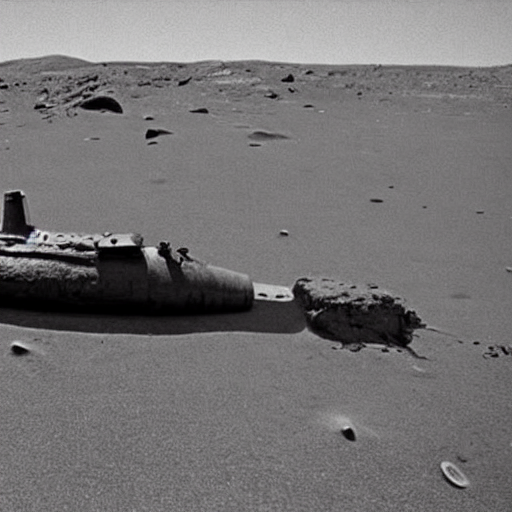

  0%|          | 0/28 [00:00<?, ?it/s]

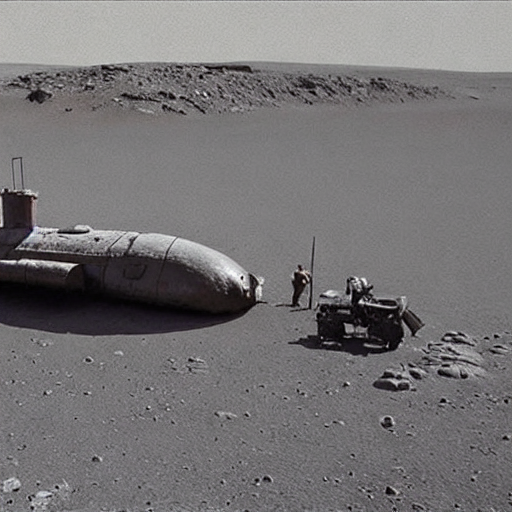

In [23]:
import numpy as np
from IPython.display import display
import torch


prompt = "a soviet submarine stranded on mars"
negative_prompt = "color green"
num_inference_steps = 40
num_images_per_prompt = 2
guidance_scale = 7.5
strength = 0.7
height = 512
width = 512

# Generate an initial image
initial_image = stable_diffusion_txt2img(prompt=prompt,
                                         strength=strength,
                                         num_inference_steps=num_inference_steps,
                                         guidance_scale=guidance_scale,
                                         height=height, width=width)[0]

display(initial_image[0])

# Refine the image using the img2img pipeline
refined_image = stable_diffusion_img2img(
    prompt=prompt,
    image=initial_image,
    strength=strength,
    guidance_scale=guidance_scale,
    num_inference_steps=num_inference_steps,
    height=height,
    width=width
)[0]

# Display the refined image
display(refined_image[0])

  0%|          | 0/40 [00:00<?, ?it/s]

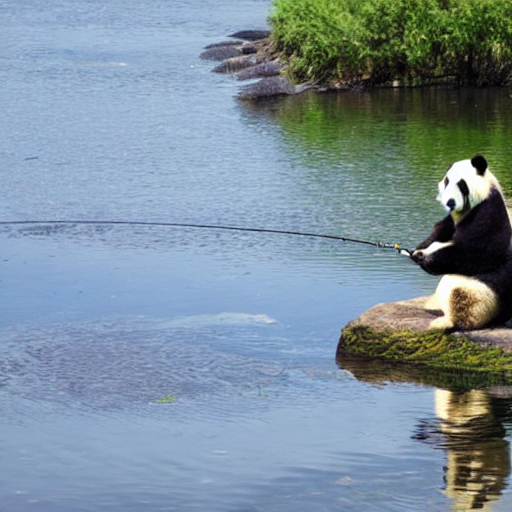

  0%|          | 0/28 [00:00<?, ?it/s]

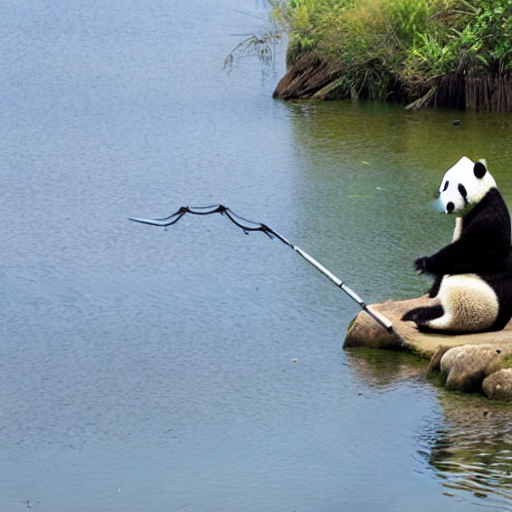

In [27]:
import numpy as np
from IPython.display import display
import torch


prompt = "a pandas sitting on the shore and fishing with a fishing rod"
negative_prompt = "color green"
num_inference_steps = 40
num_images_per_prompt = 2
guidance_scale = 7.5
strength = 0.7
height = 512
width = 512

# Generate an initial image
initial_image = stable_diffusion_txt2img(prompt=prompt,
                                         strength=strength,
                                         num_inference_steps=num_inference_steps,
                                         guidance_scale=guidance_scale,
                                         height=height, width=width)[0]

display(initial_image[0])

# Refine the image using the img2img pipeline
refined_image = stable_diffusion_img2img(
    prompt=prompt,
    image=initial_image,
    strength=strength,
    guidance_scale=guidance_scale,
    num_inference_steps=num_inference_steps,
    height=height,
    width=width
)[0]

# Display the refined image
display(refined_image[0])

  0%|          | 0/40 [00:00<?, ?it/s]

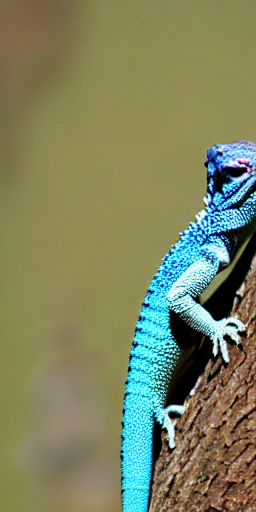

  0%|          | 0/28 [00:00<?, ?it/s]

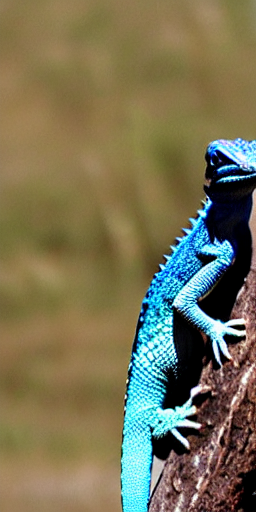

In [42]:
import numpy as np
from IPython.display import display
import torch


prompt = "blue lizard"
negative_prompt = "color green"
num_inference_steps = 40
num_images_per_prompt = 2
guidance_scale = 7.5
strength = 0.7
height = 512
width = 256

# Generate an initial image
initial_image = stable_diffusion_txt2img(prompt=prompt,
                                         strength=strength,
                                         num_inference_steps=num_inference_steps,
                                         guidance_scale=guidance_scale,
                                         height=height, width=width)[0]

display(initial_image[0])

# Refine the image using the img2img pipeline
refined_image = stable_diffusion_img2img(
    prompt=prompt,
    image=initial_image,
    strength=strength,
    guidance_scale=guidance_scale,
    num_inference_steps=num_inference_steps,
    height=height,
    width=width
)[0]

# Display the refined image
display(refined_image[0])

  0%|          | 0/40 [00:00<?, ?it/s]

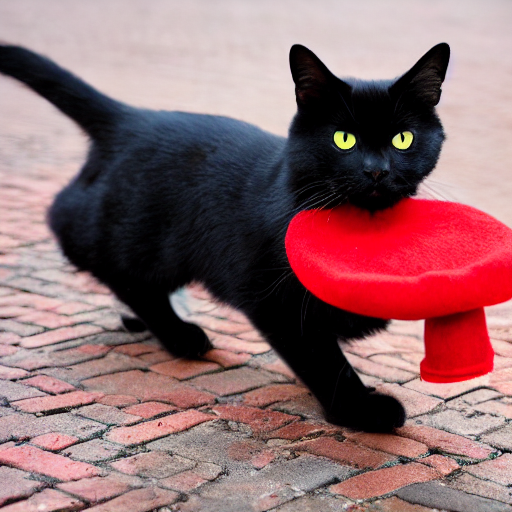

  0%|          | 0/28 [00:00<?, ?it/s]

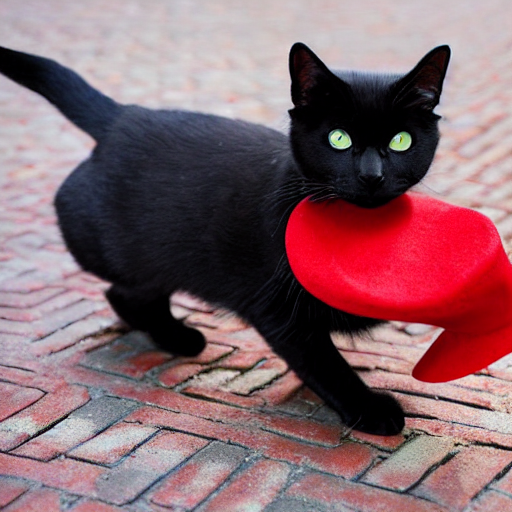

In [20]:

prompt = "realistic black cat with red hat on the street"
negative_prompt = "color green"
num_inference_steps = 40
num_images_per_prompt = 2
guidance_scale = 7.5
strength = 0.7
height = 512
width = 512

# Generate an initial image
initial_image = stable_diffusion_txt2img(prompt=prompt,
                                         num_inference_steps=num_inference_steps,
                                         guidance_scale=guidance_scale,
                                         height=height, width=width)[0]

display(initial_image[0])

# Refine the image using the img2img pipeline
refined_image = stable_diffusion_img2img(
    prompt=prompt,
    image=initial_image,
    strength=0.7,
    guidance_scale=guidance_scale,
    num_inference_steps=num_inference_steps,
    height=height,
    width=width
)[0]

# Display the refined image
display(refined_image[0])

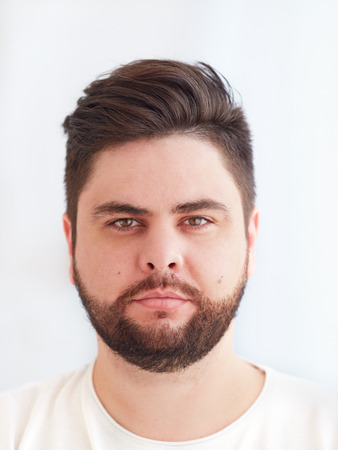

  0%|          | 0/20 [00:00<?, ?it/s]

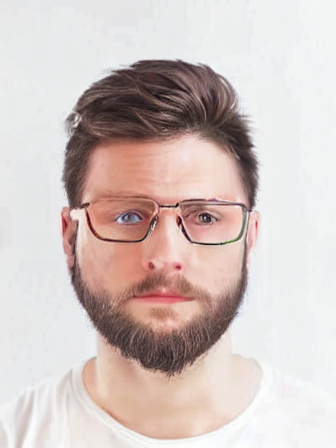

In [20]:
import numpy as np
from IPython.display import display
import torch
from PIL import Image

num_inference_steps = 40
guidance_scale = 7
strength = 0.5


image_importee = Image.open("portrait.jpg")
display(image_importee)
# Refine the image using the img2img pipeline
refined_image = stable_diffusion_img2img(
    prompt="realistic photography of a man wearing glasses",
    image=image_importee,
    strength=strength,
    guidance_scale=guidance_scale,
    num_inference_steps=num_inference_steps,

)[0]

# Display the refined image
display(refined_image[0])

In [29]:
git init

SyntaxError: invalid syntax (2830201818.py, line 1)